In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns

# Аналитика в авиакомпании

## Шаг 4. Аналитика средствами Python

Нам предоставлены 4 файла, в которых содержатся данные запросов из предыдущих заданий:
- /datasets/query_1.csv - результат первого запроса. В нём содержится информация о моделях самолётов и количествах рейсов для каждой модели в сентябре 2018 года.
- /datasets/query_3.csv - результат второго запроса. В нём модержится информация о городах, и среднем количестве рейсов пребывающих в города каждый день в сентябре 2018 года.

Для этих двух наборов данных нужно:
- импортировать файлы
- изучить данные в них
- проверить типы данных на корректность
- выбрать топ-10 городов по количеству рейсов
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов
- сделать выводы по каждому из графиков, пояснить результат

<font color=#008000> 4.1 Импортирование файлов </font>

Импортируем файл /datasets/query_1.csv в переменную df1, а файл /datasets/query_3.csv в переменную df2.

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

<font color=#008000> 4.2 Изучение данных </font>

Внимательно посмотрим на таблицу df1.

In [3]:
df1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Всё довольно просто и понятно: в первой колонке 8 моделей самолётов, тип данных 'object' (строки), а во второй - количество рейсов каждой модели в сентябре 2018 года, тип данных int64(целые числа). Пропусков нет.

Теперь посмотри на df2.

In [5]:
df2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Две колонки: город (тип данных 'object') и среднее количество рейсов в день для каждого города (float64). Пропусков нет. Тип данных приемлимый.


<font color=#008000> 4.3 Топ-10 городов по количеству рейсов </font>

Для нахождения Топ-10 городов по количеству рейсов воспользуемся методом .sort_values().

In [7]:
cities_sorted = df2.sort_values(by = 'average_flights', ascending = False)
cities_sorted.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Лидером по количеству рейсов в день сказалась Москва, с почти 130 рейсами. Далее идут Санкт-Петербург, с 31 рейсом, и Новосибирск, с 17 рейсами.


<font color=#008000> 4.4 Построение графиков и выводов</font>

Теперь мы построим следующие графики, и проанализируем получившиеся данные:

- модели самолетов и количество рейсов
- города и количество рейсов
- топ-10 городов и количество рейсов

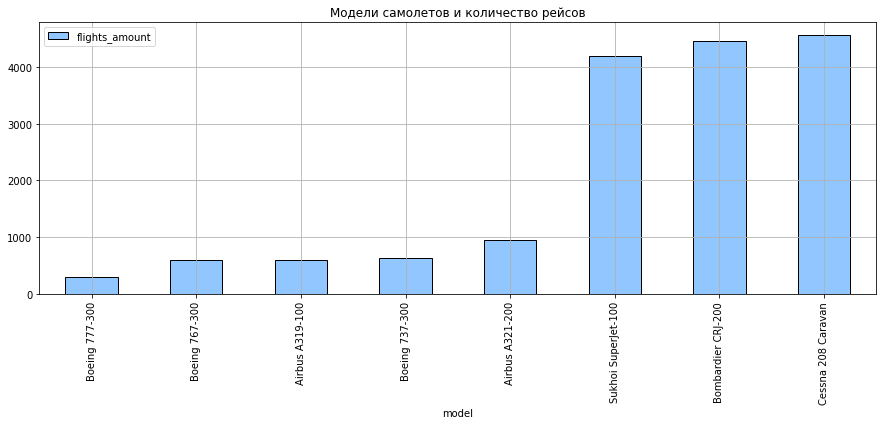

In [8]:
plt.style.use('seaborn-pastel')
df1.sort_values(by = 'flights_amount').plot(kind = 'bar',
         x = 'model',                                   
         y = 'flights_amount',
         figsize = (15,5),
         title = 'Модели самолетов и количество рейсов',
         ec = 'black',
         grid = True,
         legend = True)

Лидерами по количеству рейсов в сентябре 2018 оказались следующие модели:

- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100



У каждой модели больше 4000 рейсов в месяц. Остальные модели не набирают и 1000 рейсов в месяц.

Теперь посмотрим на города и среднее количество пребывающих рейсов в день.

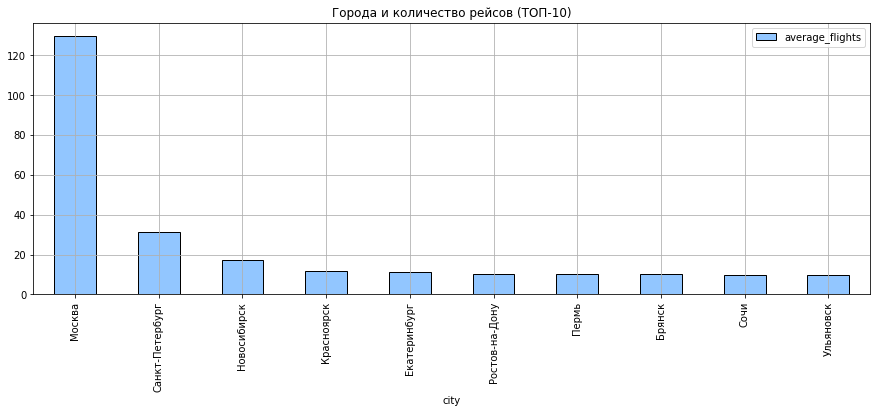

In [21]:
plt.style.use('seaborn-pastel')
cities_sorted.head(10).plot(kind = 'bar',
         x = 'city',                                   
         y = 'average_flights',
         figsize = (15,5),
         title = 'Города и количество рейсов (ТОП-10)',
         ec = 'black',
         grid = True,
         legend = True)

Лидером по количеству рейсов в день является Москва со 130 рейсами в день. За ней с очень большой разницей следует Санкт- Петербург - 30 рейсов. Москва и Санкт-Петербург - города с многомиллионным населением, деловые столицы РФ, и при этом имеющие несколько аэропортов. Это и объясняет большее количество прибывающих в день рейсов. 



Теперь построим график для всех городов.

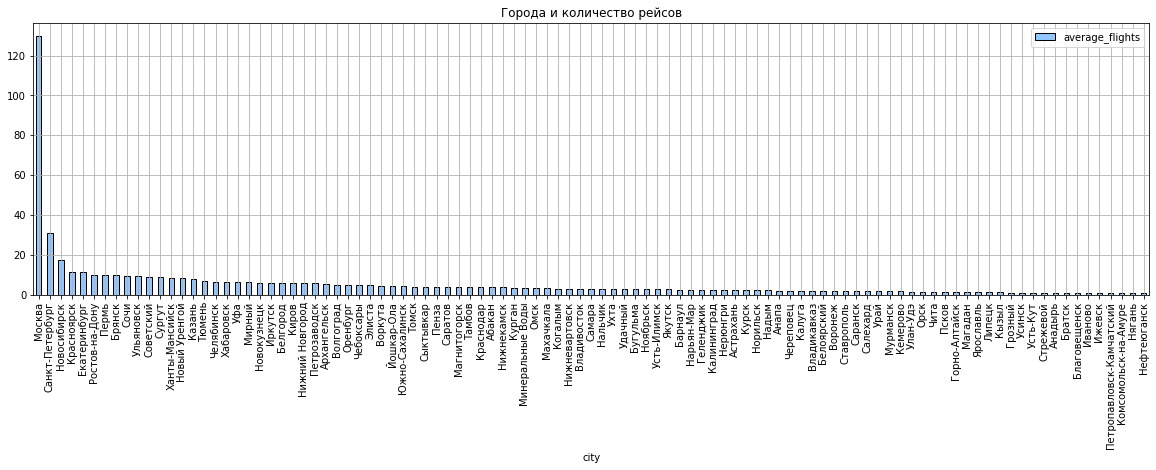

In [20]:
plt.style.use('seaborn-pastel')
cities_sorted.plot(kind = 'bar',
         x = 'city',                                   
         y = 'average_flights',
         figsize = (20,5),
         title = 'Города и количество рейсов',
         ec = 'black',
         grid = True,
         legend = True)

In [22]:
cities_sorted.tail(10)

,city,average_flights
76,Стрежевой,1.0
1,Анадырь,1.0
9,Братск,1.0
8,Благовещенск,1.0
21,Иваново,1.0
22,Ижевск,1.0
65,Петропавловск-Камчатский,1.0
31,Комсомольск-на-Амуре,1.0
58,Нягань,1.0
49,Нефтеюганск,1.0


В 95% городов пребывает меньше десяти рейсов в день. 

## Шаг 5. Проверка гипотезы средствами Python

Нам предоставлен файл /datasets/query_last.csv, содержащий следующую информацию:

- week_number — номер недели
- ticket_amount — количество проданных билетов за неделю
- festival_week — есть ли на этой неделе фестиваль
- festival_name — название фестиваля

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Для начала импортируем файл /datasets/query_last.csv и изучим его.

In [11]:
df3 = pd.read_csv('/datasets/query_last.csv')
df3.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


В колонках 'week_number' и 'ticket_amount' данные имекют тип целых чисел int64. В колонке 'festival_week' данные записаны в виде float64, а 'festival_name' в виде строк object. Убирать пропуски нет необходимости.

<font color=#008000> 5.1 Формирование и проверка гипотез </font>

Нулевая гипотеза:

- 'Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время'

Альтернативная гипотеза:

- 'Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время'

Создадим две таблицы: недели, на которых были фестивали, и недели без фестивалей.

In [13]:
festival_weeks = df3[df3['festival_week'].notnull()]['ticket_amount']
normal_weeks = df3[df3['festival_week'].isnull()]['ticket_amount']

Расчитаем p-value, и подтвердим одну из гипотез. Выборки у нас независимые, поэтому используем функцию ttest_ind. Пороговым значением alpha будет 0.05.

In [14]:
alpha = 0.05

results = st.ttest_ind(festival_weeks, normal_weeks, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтверждена. Спрос на билеты во время фестивалей не отличается от спроса в обычные дни.


# Вывод

Изучив данные по количеству рейсов для каждой модели самолёта за сентябрь 2018 года, мы выяснили, что самыми используемымси моделяи являются:
- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100

В ТОП-10 городов с самым большим количеством прибывающих рейсов вошли:

- Москва 	129.774194
- Санкт-Петербург 	31.161290
- Новосибирск 	17.322581
- Красноярск 	11.580645
- Екатеринбург 	11.322581
- Ростов-на-Дону 	10.193548
- Пермь 	10.129032
- Брянск 	10.000000
- Сочи 	9.612903
- Ульяновск 	9.580645

Также мы подтвердили гипотезу, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

